### Exemplo de Árvore
#### Aula 09/04/2022
#### Flor de Iris

In [ ]:
import pandas as pd


uri = "https://raw.githubusercontent.com/alanammorais/ml_Uniesp/master/datasets/Aula%2002/iris/iris_data.csv"
dados = pd.read_csv(uri)

In [ ]:
dados.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class '], dtype='object')

In [ ]:
(dados['class ']).unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
nome_colunas = {
    "sepal_length" : "tamanho_sepala",
    "sepal_width" : "largura_sepala",
    "petal_length" : "tamanho_petala",
    "petal_width" : "largura_petala",
    "class ": "tipo"
  }

dados = dados.rename(columns = nome_colunas)

dados

,tamanho_sepala,largura_sepala,tamanho_petala,largura_petala,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Segmentacao da amostra

In [ ]:
# X = dados[[
#     "tamanho_sepala", "largura_sepala",
#     "tamanho_petala", "largura_petala"]]

X = dados.drop(columns=['tipo'], axis=1)
X.sample(10)

,tamanho_sepala,largura_sepala,tamanho_petala,largura_petala
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
6,4.6,3.4,1.4,0.3
130,7.4,2.8,6.1,1.9
24,4.8,3.4,1.9,0.2
136,6.3,3.4,5.6,2.4
10,5.4,3.7,1.5,0.2
35,5.0,3.2,1.2,0.2
54,6.5,2.8,4.6,1.5
110,6.5,3.2,5.1,2.0


In [ ]:
y = dados['tipo']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: tipo, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

treino_x, teste_x, treino_y, teste_y = train_test_split(
            X, y, test_size =0.30, stratify = y)
print(treino_x.shape)
print(teste_x.shape)

(105, 4)
(45, 4)


### Criar e treinar a arvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
modelo = DecisionTreeClassifier(max_depth=6, criterion="entropy")
modelo.fit(treino_x, treino_y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Predicao

In [ ]:
#Teste - testando o modelo
previsoes = modelo.predict(teste_x)
previsoes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
print("A acurácia foi %.2f%%" % (accuracy_score(teste_y, previsoes)*100))

A acurácia foi 93.33%


In [ ]:
!pip install graphviz

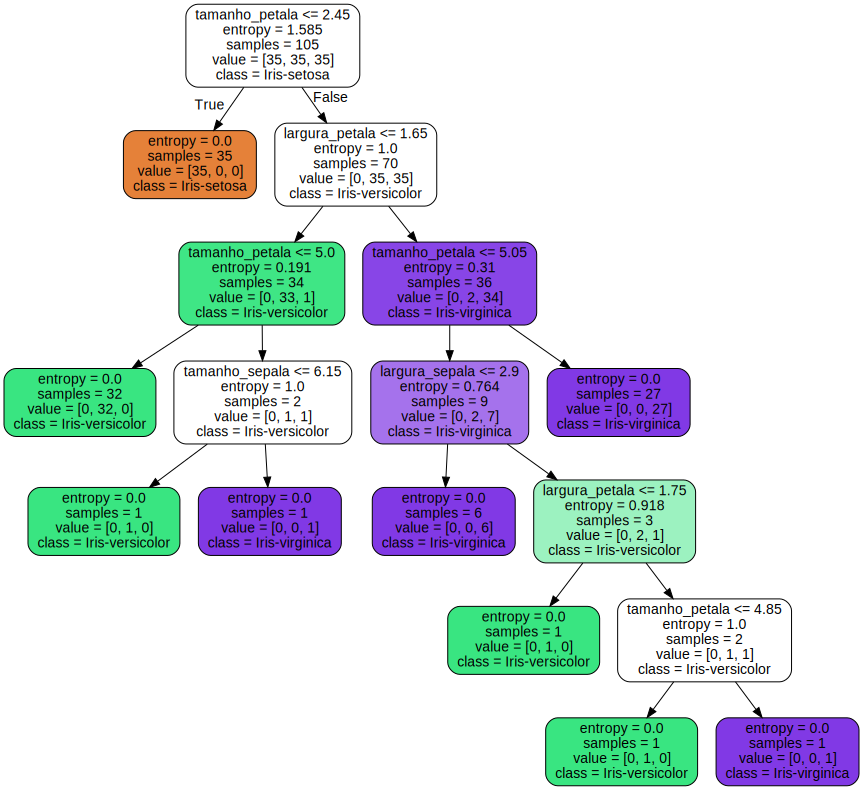

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(
    modelo, out_file=None, filled = True, 
    rounded = True, feature_names = features, 
    class_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
grafico = graphviz.Source(dot_data)
grafico